In [768]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import tree

In [769]:
df= pd.read_csv("/content/instagram_reach.csv",error_bad_lines=False)
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [770]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [771]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [772]:
df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


***Data Cleaning***

In [773]:
df.dropna()
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [774]:
df['Time since posted'] = df['Time since posted'].str.replace('hours', '')
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222


In [775]:
df.astype({'Time since posted': 'int64'}).dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted     int64
Likes                 int64
dtype: object

### ***Building the ML model***

In [776]:
x = df[['Followers','Time since posted']]
x = preprocessing.scale(x)
y = df['Likes']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **LinearRegression**

In [777]:
reg = LinearRegression()  
reg.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [778]:
y_pred = reg.predict(x)

In [779]:
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
df_1 = pd.DataFrame()
df_1['ACTUAL'] = y
df_1['PREDICTED'] = y_pred
df_1.head(10)

THE FIRST TEN PREDICTIONS ARE :  

,ACTUAL,PREDICTED
0,139,125.743153
1,23,33.520574
2,25,30.068082
3,49,40.342655
4,30,40.143791
5,18,45.264528
6,35,39.895212
7,86,56.185408
8,22,48.341345
9,18,80.170430


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


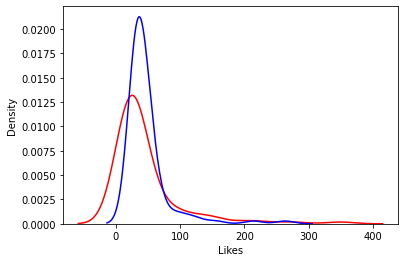

In [780]:
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value of Pred")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values of Pred" , ax=ax1)

In [781]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print(rmse)
print(r2)

43.026223874230425
0.3837834695206399


In [782]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model=make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(X_train, y_train)  
predict=model.predict(x)

In [783]:
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
df_1 = pd.DataFrame()
df_1['ACTUAL'] = y
df_1['PREDICTED'] = predict
df_1.head(10)

THE FIRST TEN PREDICTIONS ARE :  

,ACTUAL,PREDICTED
0,139,110.141526
1,23,44.267992
2,25,31.737760
3,49,35.562754
4,30,34.583980
5,18,53.775363
6,35,33.333980
7,86,62.036279
8,22,26.655033
9,18,47.699774


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


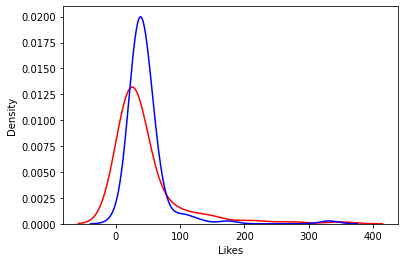

In [784]:
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value of Pred")
sns.distplot(predict, hist=False, color="b", label="Fitted Values of Pred" , ax=ax1)

In [785]:
rmse = np.sqrt(mean_squared_error(y,predict))
r2 = r2_score(y,predict)
print(rmse)
print(r2)

40.13539802608092
0.4638059039455772


### ***RandomForestRegressor***

In [786]:
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0) 
regressor.fit(x, y)  
predict1=regressor.predict(x) 

In [787]:
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
df_1 = pd.DataFrame()
df_1['ACTUAL'] = y
df_1['PREDICTED'] = predict1
df_1.head(10)

THE FIRST TEN PREDICTIONS ARE :  

,ACTUAL,PREDICTED
0,139,127.98
1,23,25.58
2,25,22.96
3,49,40.60
4,30,31.86
5,18,34.36
6,35,33.16
7,86,68.18
8,22,22.92
9,18,38.06


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


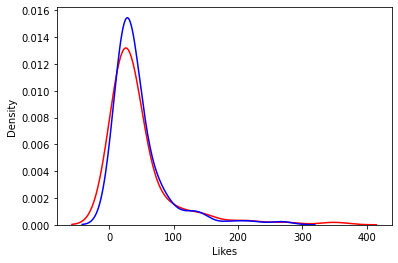

In [788]:
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value of Pred")
sns.distplot(predict1, hist=False, color="b", label="Fitted Values of Pred" , ax=ax1)

In [789]:
rmse = np.sqrt(mean_squared_error(y,predict1))
r2 = r2_score(y,predict1)
print(rmse)
print(r2)

18.345688103747975
0.8879698568977551


### ***DecisionTreeRegressor***

In [790]:
from sklearn.tree import DecisionTreeRegressor   
reg= DecisionTreeRegressor(random_state = 0)  
reg.fit(x, y) 
predict2=reg.predict(x) 

In [791]:
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
df_1 = pd.DataFrame()
df_1['ACTUAL'] = y
df_1['PREDICTED'] = predict2
df_1.head(10)

THE FIRST TEN PREDICTIONS ARE :  

,ACTUAL,PREDICTED
0,139,139.0
1,23,23.0
2,25,25.0
3,49,49.0
4,30,30.0
5,18,18.0
6,35,35.0
7,86,86.0
8,22,22.0
9,18,18.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


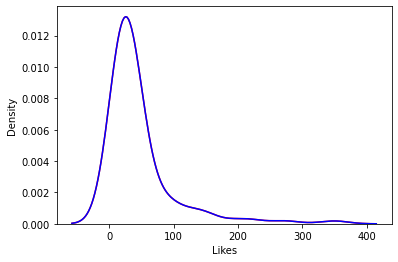

In [792]:
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value of Pred")
sns.distplot(predict2, hist=False, color="b", label="Fitted Values of Pred" , ax=ax1)

In [793]:
rmse = np.sqrt(mean_squared_error(y,predict2))
r2 = r2_score(y,predict2)
print(rmse)
print(r2)

0.0
1.0
